# TADs at 5kb resolution comparative analysis

Using TADs 5kb called by intersecting two tools (80%) from maps:<br>
*resolution = max map resolution calculated by hicres<br>
Number of TADs = number of lifted-over TADs to NPB
1. az_mrg, resolution: 1421. Number of TADs 1187<br>
2. NPB_new,  resolution: 1484. Number of TADs 1425<br>
3. IR64_new,  resolution: 1302. Number of TADs 1352<br>
4. ruf_mrg,  resolution: 1030. Number of TADs 1112<br>
5. omer_mrg,  resolution: 4155. Number of TADs 1072<br>

In [1]:
import os
os.chdir('/scratch/ak8725/comparative_TADs_boundaries/')

In [1]:
#making TAD files 3-column from 9-column and saving them to /comparative_TADs_boundaries
cd ../comparative_TADs_boundaries
# awk -F'\t' '{OFS="\t"; print $1, $2, $3}' ../az_mrg/TADs_boundaries/az_TADs_5kb_two_tools_80.bed > ../comparative_TADs_boundaries/az_TADs_5kb_two_tools_80.bed
awk -F'\t' '{OFS="\t"; print $1, $2, $3}' ../NPB_new/TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed > ../comparative_TADs_boundaries/NPB_TADs_5kb_two_tools_80.bed
# awk -F'\t' '{OFS="\t"; print $1, $2, $3}' ../IR64_new/TADs_boundaries/IR64_TADs_5kb_two_tools_80.bed > ../comparative_TADs_boundaries/IR64_TADs_5kb_two_tools_80.bed
# awk -F'\t' '{OFS="\t"; print $1, $2, $3}' ../oruf_mrg/TADs_boundaries/ruf_TADs_5kb_two_tools_80.bed > ../comparative_TADs_boundaries/oruf_TADs_5kb_two_tools_80.bed
# awk -F'\t' '{OFS="\t"; print $1, $2, $3}' ../omer_mrg/TADs_boundaries/omer_TADs_5kb_two_tools_80.bed > ../comparative_TADs_boundaries/omer_TADs_5kb_two_tools_80.bed

In [3]:
#lifting over coordinates of all 5kb 80% TADs to NPB
#To be successfully lifted over, features in one species require a 20% minimum ratio of bases (−minMatch= 0.20) for body
#and one-third for boundary (−minMatch = 0.33) to be remapped in the other species
cd ../comparative_TADs_boundaries
/share/apps/kent/385/liftOver -minMatch=0.2 az_TADs_5kb_two_tools_80.bed ../liftOver/chain_files_for_TADs/az_NPB.over.chain az_to_npb_converted_5kb_tads.bed az_npb_unmapped
/share/apps/kent/385/liftOver -minMatch=0.2 IR64_TADs_5kb_two_tools_80.bed ../liftOver/chain_files_for_TADs/IR64_NPB.over.chain IR64_to_npb_converted_5kb_tads.bed IR64_npb_unmapped
/share/apps/kent/385/liftOver -minMatch=0.2 oruf_TADs_5kb_two_tools_80.bed ../liftOver/chain_files_for_TADs/oruf_NPB.over.chain ruf_to_npb_converted_5kb_tads.bed ruf_npb_unmapped
/share/apps/kent/385/liftOver -minMatch=0.2 omer_TADs_5kb_two_tools_80.bed ../liftOver/chain_files_for_TADs/omer_NPB.over.chain omer_to_npb_converted_5kb_tads.bed omer_npb_unmapped

Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates
Reading liftover chains
Mapping coordinates


In [4]:
wc -l omer_TADs_5kb_two_tools_80.bed
wc -l omer_to_npb_converted_5kb_tads.bed 
wc -l omer_npb_unmapped

1187 omer_TADs_5kb_two_tools_80.bed
1072 omer_to_npb_converted_5kb_tads.bed
230 omer_npb_unmapped


In [108]:
# % TADs retained after liftover of 1207 NPB TADs
npb = 
az=$(echo "scale=5; 1187/1207" | bc); echo $az
ir64=$(echo "scale=5; 1352/1391" | bc); echo $ir64
ruf=$(echo "scale=5; 1112/1145" | bc); echo $ruf
ruf=$(echo "scale=5; 1072/1187" | bc); echo $ruf
npb=1425

.98342
.97196
.97117
.90311


In [ ]:
Conserved TAD bodies were de-termined using BEDTools intersect with the parameters: -f 0.8 -r, 
which requires at least 80% reciprocal overlap in the corre-sponding intervals in both species. 
We used the larger ofthe two estimates ofshared TADs across the species as the conserved domain 
count (to be conservative), and divided this by the sum ofthe conserved 
and species-specific domains identified in order to assess conser- vation.

In [ ]:
#from literature
We analyzed boundary conservation using bedtools intersect–c, considering any overlap
as indication ofconservation (i.e. even a single base pair overlap ofboundaries meant 
a bound-ary was classified as conserved).

In [1]:
#finding TADs conserved between species pairwise
#saving coordinates like they are in the Azucena file
import os
os.chdir('/scratch/ak8725/comparative_TADs_boundaries/')

import pybedtools

# Load the BED files
npb_bed = pybedtools.BedTool("NPB_az_common.bed")
az_bed = pybedtools.BedTool("IR64_to_npb_converted_5kb_tads.bed")

# Find reciprocally overlapping regions with at least 80% overlap
overlap = npb_bed.intersect(az_bed, f=0.8, r=True, wa=True)

# Initialize a list to store the overlapping intervals
common_tads = []

# Iterate through overlapping regions and save the intervals from `npb_bed`
for interval in overlap:
    chrom = interval.chrom
    start = interval.start
    end = interval.end

    common_tads.append((chrom, start, end))

# Save the coordinates of the common TADs to a new file
output_filename = "NPB_az_IR64_common.bed"
with open(output_filename, "w") as output_file:
    for chrom, start, end in common_tads:
        output_file.write(f"{chrom}\t{start}\t{end}\n")

# Count and print the number of intervals in the output file
num_intervals = len(common_tads)
print(f"Number of intervals in {output_filename}: {num_intervals}")

Number of intervals in NPB_az_IR64_common.bed: 161


***** WARNING: File IR64_to_npb_converted_5kb_tads.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	981343	1057150

***** WARNING: File IR64_to_npb_converted_5kb_tads.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	981343	1057150



In [ ]:
#number of TADs conserved between pairs, at least 80% feature overlap
NPB-az 398
NPB-IR64 375
NPB-ruf 303
NPB-omer 196

az-IR64 
az-oruf 
az-omer 
IR64-oruf 
IR64-omer 
oruf-omer 

NPB-az-IR64-ruf-omer 22
NPB-az-IR64-ruf 73
NPB-az-IR64 158

In [ ]:
#number of TADs conserved between pairs, at least 50% feature overlap
NPB-az 487
NPB-IR64 478
NPB-ruf 418
NPB-omer 350

az-IR64 
az-oruf 
az-omer 
IR64-oruf 
IR64-omer 
oruf-omer 

NPB-az-IR64-ruf-omer 40
NPB-az-IR64-ruf 98
NPB-az-IR64 206

In [ ]:
#from literature
We used our orthologous TAD presence/absence matrix to rank each D. melanogaster TAD
based on its level of conservation among the 11 species in our matrix, where a ranking of 1 represents 
a TAD that is only present in D. melanogaster and a ranking of 11 represents 
a TAD that has been conserved since the common ancestor of the melanogaster group.

## Assigning TADs to conservation groups

In [2]:
#adding score of 1 to each TAD in NPB
cd ../comparative_TADs_boundaries
awk 'BEGIN{OFS="\t"} {$4=1; print}' NPB_TADs_5kb_two_tools_80.bed > temp.bed
mv temp.bed NPB_TADs_5kb_two_tools_80.bed

In [1]:
I assigned TADs to 5 groups, based on the number of species each TAD is conserved in
I did pairwise NPB-X comparisons to assess conservation of at least 80%
1. NPB specific
2. Japonica specific (NPB+az)
3. NPB+az+ruf
4. NPB+az+tuf+IR64
4. NPB+az+ruf+IR64+omer

SyntaxError: invalid syntax (4190387318.py, line 1)

In [16]:
#identify tads shared npb-az
import os
os.chdir('/scratch/ak8725/comparative_TADs_boundaries/')

# Initialize a set to store the common TAD coordinates
common_tads = set()

# Read the NPB_az_common_TADs.bed file to extract coordinates
with open("NPB_omer_common.bed", "r") as common_file:
    for line in common_file:
        fields = line.strip().split("\t")
        if len(fields) >= 3:
            coordinates = tuple(fields[:3])
            common_tads.add(coordinates)

# Initialize a counter to keep track of incremented values
count = 0

# Read the NPB_TADs_5kb_two_tools_80.bed file and create a temporary list to store updated lines
updated_lines = []

with open("NPB_TADs.bed", "r") as npb_file:
    for line in npb_file:
        fields = line.strip().split("\t")
        if len(fields) >= 4:
            coordinates = tuple(fields[:3])
            if coordinates in common_tads:
                # Check if the coordinates are in common_tads
                # If found, increment col4 by 1 and update the line
                fields[3] = str(int(fields[3]) + 1)
                count += 1
            updated_lines.append("\t".join(fields))

# Write the updated lines back to the NPB_TADs_5kb_two_tools_80.bed file
with open("NPB_TADs.bed", "w") as npb_file:
    npb_file.writelines("\n".join(updated_lines))

print(f"Number of col4 values incremented by 1: {count}")

Number of col4 values incremented by 1: 196


In [ ]:
Now I have a list of TADs ranked by their conservation status in NPB_TADs_ranked.bed

In [1]:
#creating .bed files with NPB TAD groups
import os
os.chdir('/scratch/ak8725/comparative_TADs_boundaries/')
# Define the input file
input_file = "NPB_TADs_ranked.bed"

# Create a dictionary to store the output file handles
output_files = {}

# Open the input file and read its lines
with open(input_file, "r") as infile:
    for line in infile:
        parts = line.strip().split("\t")
        if len(parts) == 4:
            # Extract the number from the last column
            number = int(parts[3])
            
            # Define the output file name based on the number
            output_file_name = f"NPB_TADs_{number}.bed"
            
            # Check if the output file for this number already exists in the dictionary
            # If not, create a new file and add it to the dictionary
            if number not in output_files:
                output_files[number] = open(output_file_name, "w")
            
            # Write the line to the corresponding output file
            output_files[number].write(line)

# Close all output files
for file in output_files.values():
    file.close()

In [5]:
!wc -l NPB_TADs_1.bed
!wc -l NPB_TADs_2.bed
!wc -l NPB_TADs_3.bed
!wc -l NPB_TADs_4.bed
!wc -l NPB_TADs_5.bed

643 NPB_TADs_1.bed
438 NPB_TADs_2.bed
221 NPB_TADs_3.bed
98 NPB_TADs_4.bed
24 NPB_TADs_5.bed


In [3]:
head NPB_TADs_1.bed

chr01	1675000	1765000	1
chr01	2000000	2055000	1
chr01	2810000	2840000	1
chr01	2840000	2890000	1
chr01	2890000	2965000	1
chr01	2965000	3050000	1
chr01	3050000	3090000	1
chr01	3695000	3745000	1
chr01	4760000	4800000	1
chr01	5985000	6025000	1


# Analyzing enrichment for specific genes/features between 5 orthology groups

In [ ]:
Enrichment for different gene categories:
Number of genes per TAD - done
All
WGD
SSD
NLR
Domestication genes

Coverage
SV breakpoints 
SNP
TE
PhastCons - can only do for azucena
Rho - can only do for azucena
GC
Gene exp (RNA-seq) - done

In [ ]:
#finding number of specific genes per TAD (any overlap with TAD of gene body counts)
genes_X.bed #IRGSP_genes.bed
wgd_X.bed contains number of wgd genes per tad in orthogroup X
ssd_X.bed
nlr_X.bed
dom_X.bed #domestication genes

In [21]:
import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "../expression/Nip_field2017_Normal.bed"

    # Load the BED files into BedTool objects
    npb_tads = pybedtools.BedTool(npb_tads_path)
    exp_data = pybedtools.BedTool(exp_data_path)

    # Perform a "coverage" operation to associate expression values with TADs
    # The -mean option calculates the mean of the scores (expression values) in the overlapping regions
    result = npb_tads.coverage(exp_data, mean=True)

    # Create a list to store the results
    results = []

    # Iterate through the result and calculate the mean expression per TAD
    for interval in result:
        chrom_tad = interval.chrom
        start_tad = interval.start
        end_tad = interval.end
        mean_exp = float(interval.fields[4]) if interval.fields[4] != "." else 0.0  # Handle missing values
        results.append((chrom_tad, start_tad, end_tad, mean_exp))

    # Write the results to the exp_x.bed file
    output_file = f"exp_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File ../expression/Nip_field2017_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2017_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2017_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2017_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2017_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

***** WARNING: File ../expression/Nip_field2017_Normal.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	37136	37535	0

****

In [ ]:
#from Mode and tempo paper
Compact letter display: the Wilcoxon rank sum tests were performed for all pairwise comparisons between chro- matin states. 
Two-sided Wilcoxon rank sum tests were used to compare LogSD between conservation classes and resulting p values were corrected
using the Benjamini–Hochberg procedure.


In [ ]:
The Kruskal-Wallis test is a non-parametric test used to determine if there are statistically significant differences between three or more groups.

Here's a high-level overview of how you can approach this:

Combine the data from all five files into a single dataset.
Perform the Kruskal-Wallis test to assess whether there are statistically significant differences 
in the number of genes per TAD between the five groups.
If the Kruskal-Wallis test indicates that there are significant differences, you can perform 
post hoc tests (e.g., Dunn's test or pairwise Wilcoxon rank-sum tests with multiple testing correction)
to identify which specific group(s) differ from the others.

In [28]:
import pandas as pd
from scipy.stats import kruskal

# Load the data from all five files into a single DataFrame
data = {}
for group in range(1, 6):
    filename = f"nlr_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "number_of_genes"])
    data[f"group_{group}"] = df["number_of_genes"]  # Extract the number_of_genes column

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Perform the Kruskal-Wallis test on the "number_of_genes" column
statistic, p_value = kruskal(df["group_1"], df["group_2"], df["group_3"], df["group_4"], df["group_5"])

# Check the p-value for significance
if p_value < 0.05:  # You can adjust the significance level (alpha) as needed
    print("There are significant differences in the number of genes per TAD between the groups.")
else:
    print("No significant differences in the number of genes per TAD between the groups.")

No significant differences in the number of genes per TAD between the groups.


In [ ]:
Are there significant differences between the groups in the number of genes per TAD?
All genes NO
WGD genes NO
SSD genes NO
NLR genes NO
Domesticated genes NO

Are there significant differences in TAD length between groups?
No

Are there significant differences in gene coverage per 500bp between groups?
Yes

Are there significant differences in median gene expression (Nip2017 RNA-seq) per TAD between groups?
no

Are there significant differences in GC content per TAD between groups?
no

Are there significant differences in TE content per TAD between groups?
yes

Are there significant differences in SV breakpoints content per TAD between groups?
no

Are there significant differences in SNP content per TAD between groups?
no

In [ ]:
Are there significant differences between the groups in the absolute number of genes normalized by TAD count?

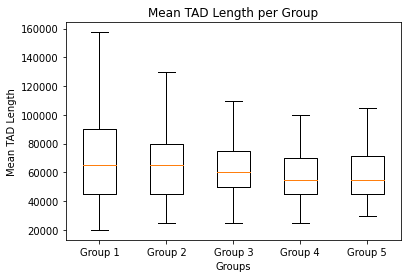

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Initialize an empty dictionary to store TAD lengths for each group
tad_lengths = {}

# Process all five input files
for x in range(1, 6):
    filename = f"NPB_TADs_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "ignore_col"])

    # Calculate TAD lengths for the current group (omit the 'ignore_col' column)
    group_name = f"Group {x}"
    tad_lengths[group_name] = df["end_tad"] - df["start_tad"]

# Create a list of TAD length values for each group
tad_length_values = list(tad_lengths.values())

# Create vertical boxplots with outliers not shown
plt.boxplot(tad_length_values, vert=True, showfliers=False)
plt.xlabel("Groups")
plt.xticks(range(1, 6), tad_lengths.keys())
plt.ylabel("Mean TAD Length")
plt.title("Mean TAD Length per Group")
plt.show()


In [14]:
import pandas as pd

# Load the data from the five NPB_TADs_x.bed files (x=1-5)
data = {}
for x in range(1, 6):
    filename = f"NPB_TADs_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "group"])
    data[f"NPB_TADs_{x}"] = df

# Calculate the mean TAD length per group
mean_lengths = {}
for x in range(1, 6):
    group_name = f"NPB_TADs_{x}"
    mean_length = data[group_name]["end"].mean() - data[group_name]["start"].mean()
    mean_lengths[group_name] = mean_length

print("Mean TAD Lengths:")
for group_name, mean_length in mean_lengths.items():
    print(f"{group_name}: {mean_length:.2f}")

from itertools import combinations
from scipy.stats import ranksums

# Perform Wilcoxon rank-sum tests for pairwise group comparisons
p_values = {}
for group1, group2 in combinations(mean_lengths.keys(), 2):
    p_value = ranksums(data[group1]["end"] - data[group1]["start"], data[group2]["end"] - data[group2]["start"]).pvalue
    comparison = f"{group1} vs. {group2}"
    p_values[comparison] = p_value

# Print the p-values for pairwise group comparisons
print("Wilcoxon Rank-Sum Test Results:")
for comparison, p_value in p_values.items():
    print(f"{comparison}: p-value = {p_value:.4f}")


Mean TAD Lengths:
NPB_TADs_1: 74327.37
NPB_TADs_2: 68156.39
NPB_TADs_3: 64020.27
NPB_TADs_4: 58596.94
NPB_TADs_5: 59791.67
Wilcoxon Rank-Sum Test Results:
NPB_TADs_1 vs. NPB_TADs_2: p-value = 0.1581
NPB_TADs_1 vs. NPB_TADs_3: p-value = 0.0362
NPB_TADs_1 vs. NPB_TADs_4: p-value = 0.0015
NPB_TADs_1 vs. NPB_TADs_5: p-value = 0.1153
NPB_TADs_2 vs. NPB_TADs_3: p-value = 0.3566
NPB_TADs_2 vs. NPB_TADs_4: p-value = 0.0107
NPB_TADs_2 vs. NPB_TADs_5: p-value = 0.1911
NPB_TADs_3 vs. NPB_TADs_4: p-value = 0.0586
NPB_TADs_3 vs. NPB_TADs_5: p-value = 0.3089
NPB_TADs_4 vs. NPB_TADs_5: p-value = 0.9974


In [ ]:
#analyzing mean expression per TAD for each group
1. calculate mean gene expression per TAD in NPB_TADs_X.bed
2. compare 5 groups using kr-w test
3. If the overall test is significant (i.e., there are differences between groups), for k-r
perform post-hoc tests to determine which specific pairs of groups are different.
4. Plot the exp data for each group

In [19]:
!sed -i 's/ /<TAB>/g' ../npb_feature_tracks/npb_sv_per_500bp.bedgraph

In [1]:
#calculate mean gene coverage per tad per group
import os
os.chdir('/scratch/ak8725/comparative_TADs_boundaries_liftover_analysis/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "../npb_feature_tracks/npb_genes_per_500bp.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"genes_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-46813626/pybedtools.yxg10eul.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.yxg10eul.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.67lxywqa.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.67lxywqa.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.vr8etgwo.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	14480000	14555000

***** WARNING: File /state/partition1/job-46813626/pybedtools.vr8etgwo.tmp has a recor

In [2]:
import os
os.chdir('/scratch/ak8725/comparative_TADs_boundaries_liftover_analysis/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"genes_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_exp_per_tad"])
    data[f"genes_{x}"] = df["mean_exp_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["genes_1"], data["genes_2"], data["genes_3"], data["genes_4"], data["genes_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (exp_x.bed files).")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"genes_{i+1}"
            group2_name = f"genes_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"genes_{idx // 4 + 1} vs. genes_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"genes_{idx // 4 + 1} vs. genes_{idx % 4 + 2}"
        group1_name = f"genes_{idx // 4 + 1}"
        group2_name = f"genes_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is a significant difference between the groups (exp_x.bed files).
P-value for genes_1 vs. genes_2: 0.0009
P-value for genes_1 vs. genes_3: 0.0000
P-value for genes_1 vs. genes_4: 0.0028
P-value for genes_1 vs. genes_5: 0.0123
P-value for genes_2 vs. genes_3: 0.0609
P-value for genes_2 vs. genes_4: 0.2872
P-value for genes_2 vs. genes_5: 0.1199
P-value for genes_3 vs. genes_4: 0.7561
P-value for genes_3 vs. genes_5: 0.3928
P-value for genes_4 vs. genes_5: 0.3988
Adjusted P-values and Significance Groups for Pairwise Comparisons:
genes_1 vs. genes_3: Adjusted P-Value=0.0000, Significance Group=a
genes_1 vs. genes_2: Adjusted P-Value=0.0043, Significance Group=a
genes_1 vs. genes_4: Adjusted P-Value=0.0093, Significance Group=a
genes_1 vs. genes_5: Adjusted P-Value=0.0307, Significance Group=a
genes_2 vs. genes_2: Adjusted P-Value=0.1218, Significance Group=a
genes_2 vs. genes_4: Adjusted P-Value=0.1998, Significance Group=b
genes_2 vs. genes_3: Adjusted P-Value=0.4103, Significance

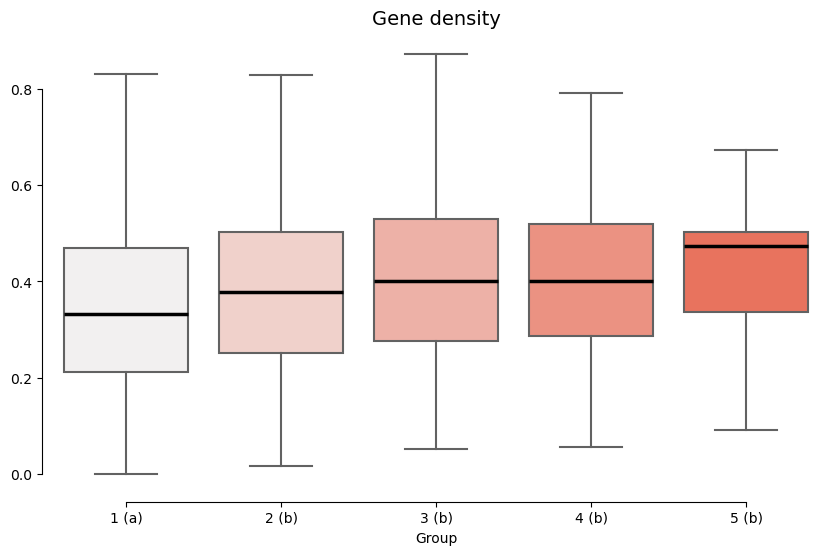

In [1]:
#plot results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map group names to significance groups
significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "b",
    "4": "b",
    "5": "b"
}

# Load the data from your files
data = {}
for group in range(1, 6):
    filename = f"genes_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "mean_exp"])
    data[f"{group}"] = df["mean_exp"]

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Convert the DataFrame to long format for Seaborn
df_long = df.melt(var_name='Group', value_name='Mean Expression')

# Map groups to significance labels
df_long['Significance'] = df_long['Group'].map(significance_mapping)

# Create a list of group labels with significance groups
group_labels = [f"{group} ({significance_mapping[group]})" for group in df.columns]

# Define a custom color palette with shades of salmon
colors = sns.color_palette("light:#FF6347", 5)  # "light:#FF6347" gives desaturated red shades

# Plot boxplots with seaborn
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(x='Group', y='Mean Expression', data=df_long, palette=colors, showfliers=False, medianprops=dict(color='black', linewidth=2.5))
sns.despine(offset=5, trim=True)

# Set the x-tick labels to include significance groups
ax.set_xticklabels(group_labels)

# Remove the grid lines
ax.grid(False)
# Remove the y-axis label
ax.set_ylabel('')

# Set the title
plt.title("Gene density", fontsize=14)

# Save the plot to an image file
plt.savefig("/scratch/ak8725/figs/figS8B-1.pdf")

# Display the plot
plt.show()

In [1]:
#calculate mean te coverage per tad per group
import os
os.chdir('/scratch/ak8725/comparative_TADs_boundaries_liftover_analysis/')

import pybedtools

# Process all five input files
for x in range(1, 6):
    # Define the paths to your input files
    npb_tads_path = f"NPB_TADs_{x}.bed"
    exp_data_path = "../npb_feature_tracks/npb_te_per_500bp.bedgraph"

    # Load the BED files into BedTool objects and exclude the 4th column
    npb_tads = pybedtools.BedTool(npb_tads_path).cut(range(3))
    exp_data = pybedtools.BedTool(exp_data_path)

    # Use the .map method to calculate the mean expression per TAD
    result = npb_tads.map(exp_data, c=4, o='mean')

    # Create a list to store the results
    results = []

    # Iterate through the result and retrieve the mean expression per TAD
    for interval in result:
        chrom = interval.fields[0]
        start = int(interval.fields[1])
        end = int(interval.fields[2])
        mean_expression = float(interval.fields[3]) if interval.fields[3] != "." else 0.0  # Handle missing values
        results.append((chrom, start, end, mean_expression))

    # Write the results to the te_x.bed file
    output_file = f"te_{x}.bed"
    with open(output_file, "w") as f:
        for result in results:
            f.write(f"{result[0]}\t{result[1]}\t{result[2]}\t{result[3]}\n")

***** WARNING: File /state/partition1/job-46813626/pybedtools.tgsr2h5v.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.tgsr2h5v.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	350000	385000

***** WARNING: File /state/partition1/job-46813626/pybedtools.ua74mcxi.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.ua74mcxi.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File /state/partition1/job-46813626/pybedtools.yfouzlmy.tmp has a record where naming convention (leading zero) is inconsistent with other files:
chr10	14480000	14555000

***** WARNING: File /state/partition1/job-46813626/pybedtools.yfouzlmy.tmp has a recor

In [1]:
import os
os.chdir('/scratch/ak8725/comparative_TADs_boundaries_liftover_analysis/')

import pandas as pd
from scipy.stats import ranksums
from scipy.stats import kruskal
from statsmodels.stats.multitest import multipletests

# Load the data from the snp_x.bed files into a DataFrame (one for each x)
data = {}
for x in range(1, 6):
    filename = f"te_{x}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr_tad", "start_tad", "end_tad", "mean_exp_per_tad"])
    data[f"te_{x}"] = df["mean_exp_per_tad"]

# Perform Kruskal-Wallis test
statistic, p_value = kruskal(data["te_1"], data["te_2"], data["te_3"], data["te_4"], data["te_5"])

if p_value < 0.05:
    print("There is a significant difference between the groups (exp_x.bed files).")

    # Perform Wilcoxon rank sum tests for all pairwise comparisons
    p_values = []

    for i in range(5):
        for j in range(i + 1, 5):
            group1_name = f"te_{i+1}"
            group2_name = f"te_{j+1}"
            group1 = data[group1_name]
            group2 = data[group2_name]

            # Perform the Wilcoxon rank sum test
            stat, p = ranksums(group1, group2)
            p_values.append(p)
            print(f"P-value for {group1_name} vs. {group2_name}: {p:.4f}")

    # Adjust p-values using the Benjamini-Hochberg procedure
    adjusted_p_values = multipletests(p_values, method='fdr_bh')[1]

    # Create significance groups based on the adjusted p-values
    sorted_comparisons = sorted(list(zip(adjusted_p_values, range(len(adjusted_p_values)))))
    significance_mapping = {}
    current_group = 'a'
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        significance_mapping[comparison] = current_group
        if adjusted_p >= 0.05:
            current_group = chr(ord(current_group) + 1)

    # Print adjusted p-values and significance groups for all pairwise comparisons
    print("Adjusted P-values and Significance Groups for Pairwise Comparisons:")
    for (adjusted_p, idx) in sorted_comparisons:
        comparison = f"te_{idx // 4 + 1} vs. te_{idx % 4 + 2}"
        group1_name = f"te_{idx // 4 + 1}"
        group2_name = f"te_{idx % 4 + 2}"
        print(f"{comparison}: Adjusted P-Value={adjusted_p:.4f}, Significance Group={significance_mapping[comparison]}")

There is a significant difference between the groups (exp_x.bed files).
P-value for te_1 vs. te_2: 0.0000
P-value for te_1 vs. te_3: 0.0000
P-value for te_1 vs. te_4: 0.0000
P-value for te_1 vs. te_5: 0.0006
P-value for te_2 vs. te_3: 0.0004
P-value for te_2 vs. te_4: 0.0009
P-value for te_2 vs. te_5: 0.0159
P-value for te_3 vs. te_4: 0.7112
P-value for te_3 vs. te_5: 0.2626
P-value for te_4 vs. te_5: 0.3405
Adjusted P-values and Significance Groups for Pairwise Comparisons:
te_1 vs. te_3: Adjusted P-Value=0.0000, Significance Group=a
te_1 vs. te_4: Adjusted P-Value=0.0000, Significance Group=a
te_1 vs. te_2: Adjusted P-Value=0.0001, Significance Group=a
te_2 vs. te_2: Adjusted P-Value=0.0009, Significance Group=a
te_1 vs. te_5: Adjusted P-Value=0.0011, Significance Group=a
te_2 vs. te_3: Adjusted P-Value=0.0015, Significance Group=a
te_2 vs. te_4: Adjusted P-Value=0.0228, Significance Group=a
te_3 vs. te_2: Adjusted P-Value=0.3282, Significance Group=a
te_3 vs. te_3: Adjusted P-Value=

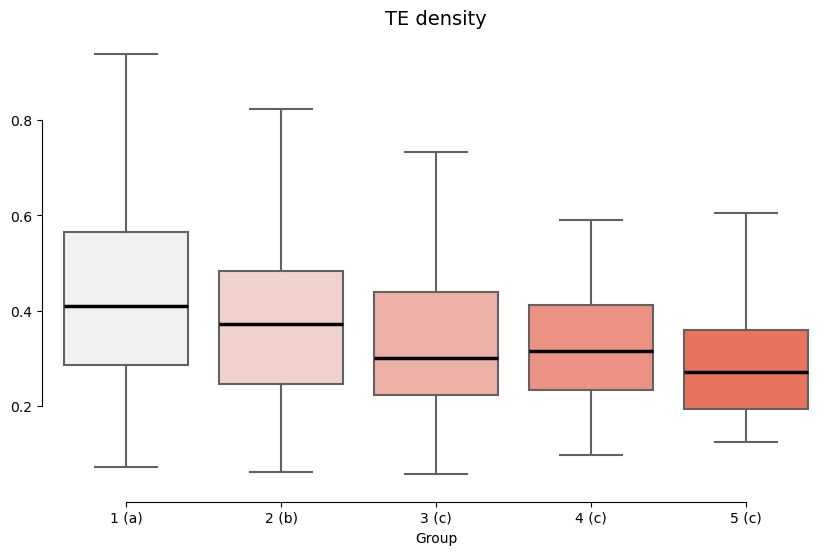

In [3]:
#plot results
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Create a dictionary to map group names to significance groups
significance_mapping = {
    "1": "a",
    "2": "b",
    "3": "c",
    "4": "c",
    "5": "c"
}

# Load the data from your files
data = {}
for group in range(1, 6):
    filename = f"te_{group}.bed"
    df = pd.read_csv(filename, sep='\t', header=None, names=["chr", "start", "end", "mean_exp"])
    data[f"{group}"] = df["mean_exp"]

# Create a DataFrame with the loaded data
df = pd.DataFrame(data)

# Convert the DataFrame to long format for Seaborn
df_long = df.melt(var_name='Group', value_name='Mean Expression')

# Map groups to significance labels
df_long['Significance'] = df_long['Group'].map(significance_mapping)

# Create a list of group labels with significance groups
group_labels = [f"{group} ({significance_mapping[group]})" for group in df.columns]

# Define a custom color palette with shades of salmon
colors = sns.color_palette("light:#FF6347", 5)  # "light:#FF6347" gives desaturated red shades

# Plot boxplots with seaborn
plt.figure(figsize=(10, 6))

# Create a boxplot
ax = sns.boxplot(x='Group', y='Mean Expression', data=df_long, palette=colors, showfliers=False, medianprops=dict(color='black', linewidth=2.5))
sns.despine(offset=5, trim=True)

# Set the x-tick labels to include significance groups
ax.set_xticklabels(group_labels)

# Remove the grid lines
ax.grid(False)
# Remove the y-axis label
ax.set_ylabel('')

# Set the title
plt.title("TE density", fontsize=14)

# Save the plot to an image file
plt.savefig("/scratch/ak8725/figs/fig8B-2.pdf")

# Display the plot
plt.show()

In [13]:
import pybedtools

# Load the BED files
npb_tads1 = pybedtools.BedTool("NPB_TADs_1.bed")
npb_tads2 = pybedtools.BedTool("NPB_TADs_2.bed")
npb_tads3 = pybedtools.BedTool("NPB_TADs_3.bed")
npb_tads4 = pybedtools.BedTool("NPB_TADs_4.bed")
npb_tads5 = pybedtools.BedTool("NPB_TADs_5.bed")
nlr_genes = pybedtools.BedTool("../annotations/domestication_genes.bed")

# Use the intersect method at the BedTool level to find overlaps
# The "c" option will count the number of hits from B in each interval from A
overlap1 = npb_tads1.intersect(nlr_genes, c=True)
overlap2 = npb_tads2.intersect(nlr_genes, c=True)
overlap3 = npb_tads3.intersect(nlr_genes, c=True)
overlap4 = npb_tads4.intersect(nlr_genes, c=True)
overlap5 = npb_tads5.intersect(nlr_genes, c=True)

# Calculate the total number of overlapping NLR genes
total_overlap_count1 = sum(int(interval[-1]) for interval in overlap1)
total_overlap_count2 = sum(int(interval[-1]) for interval in overlap2)
total_overlap_count3 = sum(int(interval[-1]) for interval in overlap3)
total_overlap_count4 = sum(int(interval[-1]) for interval in overlap4)
total_overlap_count5 = sum(int(interval[-1]) for interval in overlap5)

# Print the result
print(f"Total number of NLR genes that intersect with NPB_TADs_1.bed: {total_overlap_count1}")
print(f"Total number of NLR genes that intersect with NPB_TADs_2.bed: {total_overlap_count2}")
print(f"Total number of NLR genes that intersect with NPB_TADs_3.bed: {total_overlap_count3}")
print(f"Total number of NLR genes that intersect with NPB_TADs_4.bed: {total_overlap_count4}")
print(f"Total number of NLR genes that intersect with NPB_TADs_5.bed: {total_overlap_count5}")

Total number of NLR genes that intersect with NPB_TADs_1.bed: 17
Total number of NLR genes that intersect with NPB_TADs_2.bed: 20
Total number of NLR genes that intersect with NPB_TADs_3.bed: 6
Total number of NLR genes that intersect with NPB_TADs_4.bed: 7
Total number of NLR genes that intersect with NPB_TADs_5.bed: 2


***** WARNING: File ../annotations/domestication_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	13512627	13516105

***** WARNING: File ../annotations/domestication_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	13512627	13516105

***** WARNING: File ../annotations/domestication_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	13512627	13516105

***** WARNING: File ../annotations/domestication_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	13512627	13516105

***** WARNING: File ../annotations/domestication_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	13512627	13516105

***** WARNING: File ../annotations/domestication_genes.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10

## Domestication genes
From https://doi.org/10.1038/s41477-023-01476-z (Nat Plants 2023)

In [ ]:
Supplementary Table 15. List of 192 domestication relevant genes in rice. 
These genes were determined based on (i) they have been identified in rice with their functions 
being characterized and (ii) they belong to the PSGs (i.e., the genes that exhibited signature of 
selection in both japonica and indica) identified in this study.

In [ ]:
From Kou et al., 2020
Finally, given the consensus that domestication genes were introgressed into indica from japonica 
(Choi and Purugganan 2018a), a previous study remarked that domestication genes 
should be enriched in regions of low divergence between the two cultivars (Huang et al. 2012).

## Extract specific/not-specific TADs (for Sonia's project)

In [ ]:
NPB_TADs_2.bed = japonica TADs (NPB+az)

In [20]:
from pybedtools import BedTool

def subtract_bed_files(input_bed, subtract_bed, output_bed):
    # Load BED files
    input_bedtool = BedTool(input_bed)
    subtract_bedtool = BedTool(subtract_bed)

    # Perform subtraction
    result_bedtool = input_bedtool.subtract(subtract_bedtool)

    # Save the result to a new file
    result_bedtool.saveas(output_bed)

if __name__ == "__main__":
    # Specify input and output file paths
    input_bed_file = "NPB_TADs.bed"
    subtract_bed_file = "japonica_tads.bed"
    output_bed_file = "not_japonica_tads.bed"

    # Perform the subtraction
    subtract_bed_files(input_bed_file, subtract_bed_file, output_bed_file)

    print(f"Operation complete. Result saved to {output_bed_file}")

Operation complete. Result saved to not_japonica_tads.bed


***** WARNING: File japonica_tads.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

***** WARNING: File japonica_tads.bed has a record where naming convention (leading zero) is inconsistent with other files:
chr10	567500	680000

